# Imports

In [14]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the dataset

In [3]:
#Load Spam Data and review content
spam_data = pd.read_csv("Spam-Classification.csv")

print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())


Loaded Data :
------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


# Separate input features and output

In [4]:
#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

# Preprocessing

In [8]:
# Installing the necessary text pre-processing libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#Custom tokenizer to remove stop words and to use the lemmitization
def customtokenize(str):
    # Converting the string into tokens
    tokens = nltk.word_tokenize(str)
    # Filtering of stop words
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized
    

In [10]:
# Building a TF-IDF vectorizer model which is an NLP technique
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
#Converting input into TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
#Converting the TF-IDF vectors into array which is the preferred input for kears
tfidf_array = tfidf.toarray()

In [11]:
# Label encoding of the output to convert it to numeric representation
label_encoder = LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

# Converting the output to one hot encoding vector for keras
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

In [12]:
# Splitting the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)

In [13]:
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

TF-IDF Matrix Shape :  (1500, 4569)
One-hot Encoding Shape :  (1500, 2)


# Training and Evaluating the Model

In [16]:
NB_CLASSES=2 #No of outputs
N_HIDDEN=32 # No of nodes in the hidden layer

#Initialization of the keras Sequential Model
model = tf.keras.models.Sequential()

#Add the first hidden layer in the model
model.add(
    keras.layers.Dense(
        N_HIDDEN,
        input_shape=(X_train.shape[1],), #No. of inputs
        name="Hidden-Layer-1", #Hidden Layer name
        activation='relu' # activation function
    )
)
model.add(
    keras.layers.Dense(
        N_HIDDEN,
        name="Hidden-Layer-2",
        activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        NB_CLASSES,
        name="Output-Layer",
        activation="softmax"
    )
)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146240    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147,362
Trainable params: 147,362
Non-trainable params: 0
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
5/5 [==============================] - 1s 79ms/step - loss: 0.6920 - accuracy: 0.5444 - val_loss: 0.6889 - val_accuracy: 0.7333
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.6853 - accuracy: 0.8241 - val_loss: 0.6807 - val_accuracy: 0.8741
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6737 - accuracy: 0.9157 - val_loss: 0.6683 - val_accuracy: 0.9259
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.6574 - accuracy: 0.9509 - val_loss: 0.6518 - val_accuracy: 0.9333
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6364 - accuracy: 0.9667 - val_loss: 0.6325 - val_accuracy: 0.9407
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6111 - accuracy: 0.9676 - val_loss: 0.6094 - val_accuracy: 0.9481
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5819 - accuracy: 0.9722 - val_loss: 

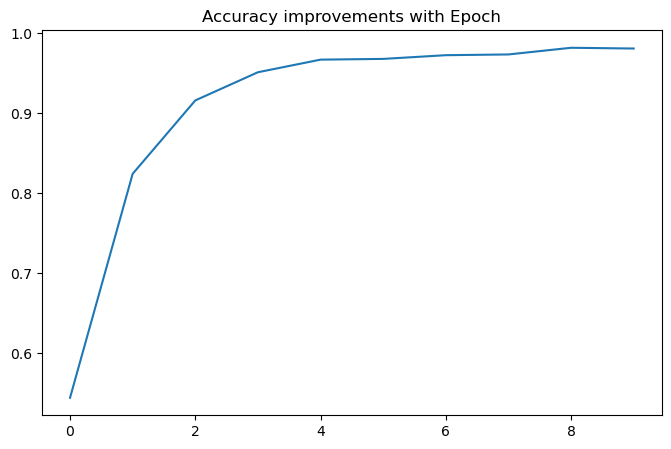


Evaluation against Test Dataset :
------------------------------------
5/5 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 0.9467


[0.500034511089325, 0.9466666579246521]

In [17]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)